## Tutorials

Here we will learn some ```bvlain``` routines on the example of NaVPO$_4$F compound (see fig. 1 below)

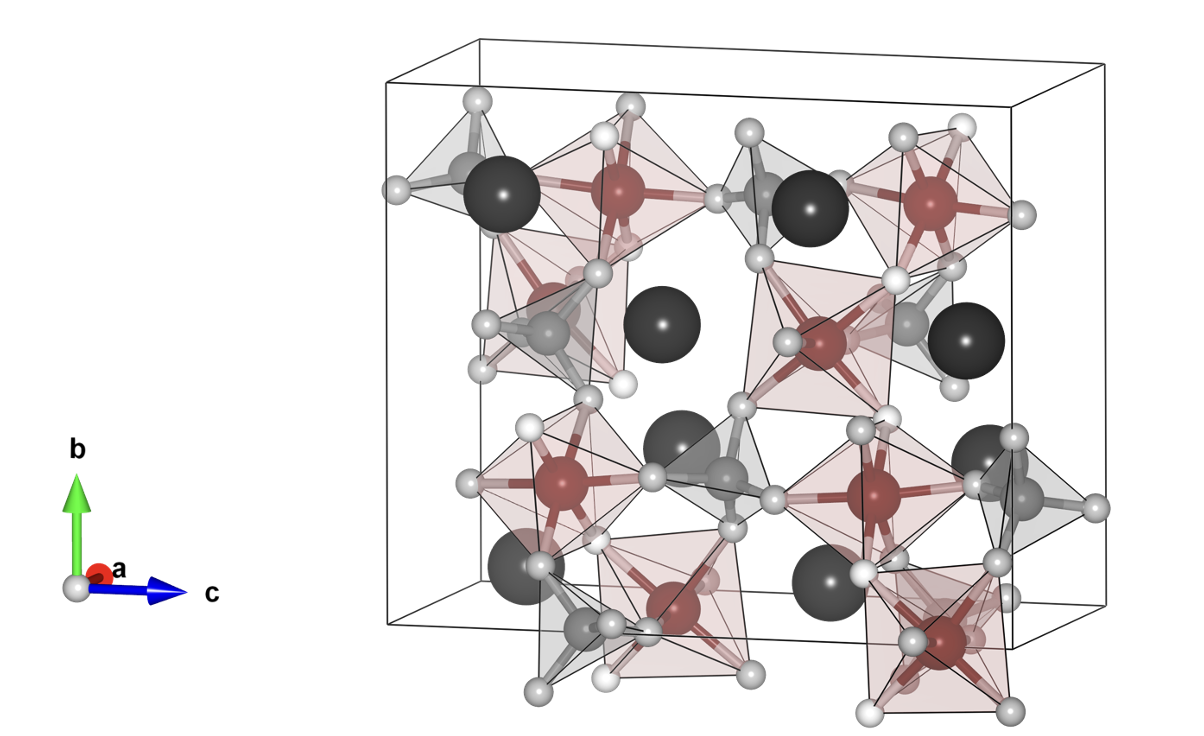
<center>Figure 1. Crystal structure of KTP-structured NaVPO$_4$F. Black spheres are Na$^{+}$ ions</center> 

#### How it is supposed to work

The sequence of steps for calculation is following:  

1) Import class from the package `from bvlain import Lain`  

2) Define the calculator `calc = Lain()`  

3) Read structure `calc.read_file('file.cif')`  

4) Define parameters for BVSE distribution calculation `params = {'some_param': some_value, ...}`  

5) Calculate BVSE distribution `calc.bvse_distribution(**params)`  

6) After the last step we have the distribution  

7) Apply method on the top of this distribution: `calc.percolation_analysis(encut = 5.0)`, etc.

<mark>Note: methods depending on BVSE distribution won't work before `calc.bvse_distribution(**params)` is invoked</mark>

### Import

In [1]:
from bvlain import Lain

#### Calculation of BVSE distribution

In [2]:
file = '/Users/artemdembitskiy/Downloads/NaVPO4F.cif' # your .cif file, only ordered structures allowed

calc = Lain(verbose = True)        # define calculator
calc.read_file(file) # read structure

# define params
params = { 
    'mobile_ion': 'Na1+',
    'r_cut': 10.0,
    'resolution': 0.2,
    'k': 100
}

_ = calc.bvse_distribution(**params) # calculate bvse distribution

getting BVSE distribution...
	collecting force field parameters... Na | charge: 1.0
	collecting neighbors...
distribution is ready



#### Percolation analysis

In [8]:
calc.percolation_barriers(encut = 5.0)

{'E_1D': 0.166, 'E_2D': 0.4395, 'E_3D': 0.4492}

That's it. As you could see, there is a quite low activation threshold for 1D percolation (see fig.2). At 0.45 eV the percolation network becomes 3-dimensional (not shown). Note that the percolation thresholds are found with 0.01 eV precision.

#### Write .grd file for VESTA 3.0

In [9]:
calc.write_grd(file)


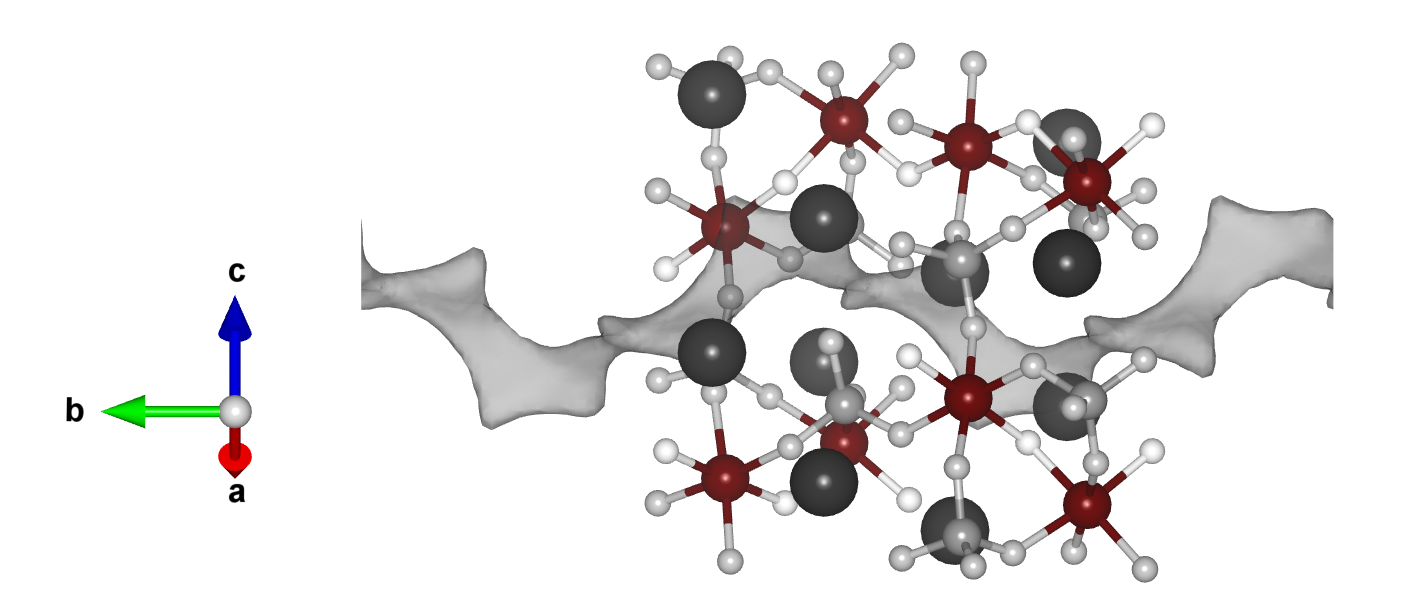
<center>Figure 2. Na$^+$ 1D percolation trajectory in VPO$_4$F framework. Black spheres are Na$^{+}$ ions</center> 

### BVS mismatch
Also we can check if assigned oxidation states are in agreement with crystal structure. It can be done with `Lain.mismatch` method that calculates Bond Valence sum mismatch.

In [10]:
table = calc.mismatch(r_cut = 4.0)
print(table.to_string())

   atom     x/a     y/b     z/c  formal_charge       bvs  mismatch
0    Na  0.7735  0.2784  0.3557              1  0.727085 -0.272915
1    Na  0.2265  0.7784  0.6443              1  0.727085 -0.272915
2    Na  0.7265  0.2784  0.8557              1  0.727085 -0.272915
3    Na  0.2735  0.7784  0.1443              1  0.727085 -0.272915
4    Na  0.7942  0.0479  0.1034              1  0.793218 -0.206782
5    Na  0.2058  0.5479  0.8966              1  0.793218 -0.206782
6    Na  0.7058  0.0479  0.6034              1  0.793218 -0.206782
7    Na  0.2942  0.5479  0.3966              1  0.793218 -0.206782
8     V  0.4992  0.0064  0.3828              3  2.736372 -0.263628
9     V  0.5008  0.5064  0.6172              3  2.736372 -0.263628
10    V  0.0008  0.0064  0.8828              3  2.736372 -0.263628
11    V  0.9992  0.5064  0.1172              3  2.736372 -0.263628
12    V  0.2506  0.2509  0.2415              3  2.690837 -0.309163
13    V  0.7494  0.7509  0.7585              3  2.690837 -0.30